<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>

Embedding_layer: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
    
pooling layer theory: https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/
    
<hr>


http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
https://github.com/NLPH/NLPH
    
word2vec: http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
    
TI-IDF: https://triton.ml/blog/tf-idf-from-scratch
    
</div>

# Result:

In [ ]:
Reuslt = {}

# Load Data:

In [4]:
import numpy as np
import pandas as pd
import re

In [5]:
#data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
data_path = "/Users/apple/Documents/Programming/python/Project/data/tweets/Third__CLean_training.1600000.process.csv"
df_data = pd.read_csv(data_path)
df_data = df_data.dropna().reset_index()


df_data['text'] = df_data['text'].apply(lambda x: re.sub('-PRON- ','',x))
df_data['text'] = df_data['text'].apply(lambda x: re.sub('-PRON-','',x))

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530184 entries, 0 to 1530183
Data columns (total 4 columns):
index         1530184 non-null int64
created_at    1530184 non-null object
text          1530184 non-null object
label         1530184 non-null int64
dtypes: int64(2), object(2)
memory usage: 46.7+ MB


In [6]:
df_data.head(2)

,index,created_at,text,label
0,0,Mon Apr 06 22:19:49 PDT 2009,upset not updat facebook text might cri result...,0
1,1,Mon Apr 06 22:19:53 PDT 2009,dive mani time ball manag save rest go bound,0


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Preprocessing Data: <h1>
</div>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data,_ = train_test_split(df_data, train_size=0.20)
data = data.reset_index()
print(len(data))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


306036


In [11]:
data.head()

,level_0,index,created_at,text,label
0,787633,816211,Sat Apr 18 08:51:41 PDT 2009,sometim littl cryptic lol mess good sport,4
1,994704,1034493,Thu May 28 21:00:21 PDT 2009,yay hot tramp love,4
2,480550,498083,Mon Jun 15 18:20:50 PDT 2009,pathet tear lie eventu kill butterfli,0
3,24939,25803,Sun Apr 19 08:29:59 PDT 2009,not like sore throat seem,0
4,545994,565851,Wed Jun 17 06:51:32 PDT 2009,right befor bed last night ate bowl full pickl...,0


<div style="width:100%;height:40px;border: 4px solid black;background-color:#660099;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4> Tfidf and PCA </h4>
</div>

In [12]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.decomposition import PCA
from dask import delayed

In [13]:
tfidf_vect= TfidfVectorizer(  use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(1,2))
data_vectorized = tfidf_vect.fit_transform(data['text'])

print('Lenght of data:',len(data_vectorized.toarray()))
print('Lenght of one_row of data:',len(data_vectorized.toarray()[12]),len(data_vectorized.toarray()[22]))

Lenght of data: 306036
Lenght of data: 1042908 1042908


In [ ]:
max_length = 50
pca_ = PCA(n_components = max_length )
viz_data = pca_.fit_transform(data_vectorized.toarray()) 

print('Lenght of data:',len(viz_data))
print('Lenght of data:',len(viz_data[12]),len(viz_data[22]))

# faster:

In [ ]:
max_length = 50

tfidf_vect= TfidfVectorizer(  use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(1,2))
pca_ = PCA(n_components = max_length )
data_vectorized = delayed(tfidf_vect.fit_transform)(data['text'])
viz_data = delayed(pca_.fit_transform)(data_vectorized.toarray()) 
viz_data = viz_data.compute()

In [11]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [14]:
max_length = 50
modeL_preprossing = Pipeline(memory=None,
         steps=[('Tfidf',TfidfVectorizer(  use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(1,2))),
                ('pca',PCA(n_components = max_length ))])

data_vectorized = modeL_preprossing.fit_transform(data['text'])

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

<div style="width:100%;height:40px;border: 4px solid black;background-color:#660099;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4>  Tweets_50d: </h4>
</div>

In [5]:
from farhad.TextAwsome import Text_Embadding

In [5]:
gl = Text_Embadding()
gl.__info__()

 
        ------------------------------------------------------------------- 

        Funcation:
        0. model_GLove = Text_Embadding(df.text) 
        
        
Choose one of dicationary below:
        1. model_GLove.Glove_100k_6B_50d()
        1. model_GLove.Glove_twitter_27B_25d()
        1. model_GLove.Glove_twitter_27B_50d()
        1. Glove_datastories_twitter_50d(
        
Next:
        2. data_embedding = model_GLove.data2vec()  
        3. sent_embedding = model_GLove.sent2vec(text) just for a sentences
        
For saving file: 

        4. model_GLove.save_file(name_file_save)
        ------------------------------------------------------------------------
        


In [7]:
glove_model = Text_Embadding(df_data.text)
glove_model.Glove_datastories_twitter_50d()
data_ET50d = glove_model.data2vec()  

Found 658125 word vectors.
Lenght of data: 1530184
lenght of features: 50


<div style="width:100%;height:40px;border: 4px solid black;background-color:#660099;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4>   Glove 50d: </h4>
</div>

In [ ]:
from farhad.TextAwsome import Text_Embadding

In [20]:
glove_model = Text_Embadding(df_data.clean_text)
glove_model.Glove_100k_6B_50d()
data_EG50d = glove_model.data2vec()  

Found 100000 word vectors.
Lenght of data: 2816
lenght of features: 50


In [7]:
glove_model.problem

{420: 0.0, 551: 0.0, 1517: 0.0}

<div style="width:100%;height:40px;border: 4px solid black;background-color:#660099;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4>  Elmo </h4>
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ready for model: <h1>
</div>

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
#x = viz_data 
x = data_ET50d 
y = [i for i in df_data['label']]

In [13]:
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.40, random_state =32, shuffle=True)

print('lenght of x_train: ', len(y_train))
print('lenght of x_test: ',len(y_test))

print("example of y: ", y_train[1:10])
print("example of x: \n", x_train[0])


lenght of x_train:  918110
lenght of x_test:  612074
example of y:  [4, 0, 4, 0, 4, 4, 4, 0, 0]
example of x: 
 [ 4.56551537e-02  1.11414276e-01  1.09391864e-02  1.06949046e-01
  7.60812610e-02  4.95814756e-02 -1.14290871e-01  8.05688128e-02
  1.07951127e-01 -1.83758065e-02  7.26123631e-01  1.33373179e-02
 -6.78690907e-04 -2.17103548e-02  1.04666715e-02  7.79138878e-02
  1.78970486e-01  7.91496038e-02 -4.95879799e-02 -5.93567453e-02
 -6.24255128e-02  1.31175905e-01 -2.67426312e-01  1.82292446e-01
 -8.69711488e-03  1.41504426e-02 -1.40905902e-01  7.65895247e-02
 -5.37974797e-02 -4.27166075e-02  6.24211170e-02  1.05143143e-02
 -7.60698691e-02 -1.48892105e-01 -6.13339692e-02 -1.34831741e-01
 -2.73604449e-02 -1.72613189e-01  1.48584753e-01  4.75583412e-02
  6.98466524e-02  2.51355082e-01 -6.33113757e-02 -3.86158028e-03
 -7.99351633e-02  4.15474996e-02 -7.61633515e-02 -3.05721965e-02
 -2.03831978e-02 -5.55787385e-02]


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> The goal is imrove deep learning model for text analysis here. </h1>
</div>

In [14]:
"""  
improve the first pakge for deep_learning_text_analysis, 
I call it Game_of_thrones :).

"""

'  \nimprove the first pakge for deep_learning_text_analysis, \nI call it Game_of_thrones :).\n\n'

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, MaxPool1D, GlobalMaxPool1D, LSTM, RNN, Conv1D,Flatten, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.train import AdamOptimizer

from farhad_DL.utility import plot_confusion_matrix
from farhad_DL.utils import TimeSummary, plot_training_summary, Estimate_fasterD


from sklearn.metrics import confusion_matrix
from tensorflow.logging import set_verbosity, ERROR

from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import  cross_val_score

Using TensorFlow backend.


In [19]:
#!mkdir wieght_save

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4> first_model, from Training of tensorflow page </h4>
</div>

In [21]:
def first_model(vocab_size , max_length):
    """
    https://www.youtube.com/watch?v=vPrSca-YjFg&frags=pl%2Cwn
    Text classification with movie reviews by google
    ----------------------------------------------------------
    
    """
    model = Sequential()
    model.add(Embedding(vocab_size, 32, input_length=max_length))# 
    model.add(GlobalAveragePooling1D())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=AdamOptimizer(), loss='binary_crossentropy', metrics=['acc'])
    return model

In [ ]:
set_verbosity(ERROR)
epochs = 100
max_length= 50
vocab_size = 650000

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/weights_for_first.hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)

# embedding_matrix
model = first_model(vocab_size , max_length = max_length)
history = model.fit(x_train,y_train, validation_split=0.20, batch_size=160 ,verbose=0, epochs=epochs, callbacks=[monitor,checkpoint,time_summary,estimetor])


plot_training_summary(history,time_summary)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy : %.2f%%" % (scores[1]*100))

In [ ]:
print('Test loss: {}'.format(scores[0]))
print('Test accuracy: {}'.format(scores[1]))

**The best accuracy: 51.06%**
>For:
epochs: 100        <br>
batch_size: 80    <br>
max_length: 50       <br>
vocab_size: 10,000 or 6,000     <br>

In [ ]:
cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [ ]:
save_path= 'model_save'
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)
    
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))

# scoe = cross_val_score(classifier,x_train, y_train , cv=5);

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h4> model_Tweets50 (I get fantastic result with before) </h4>
</div>

In [25]:
def model_Tweets50(input_dim, output_dim=64):
    """
    input_dim : Size of the vocabulary
    output_dim: Dimension of the dense embedding.
    input_length: Length of input sequences
    
    """
    model = Sequential()
    model.add(Embedding(input_dim, output_dim))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(output_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [26]:
set_verbosity(ERROR)
epochs = 20
max_length = 50
vocab_size = 658125


monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save2/2best_weights_for_second_(unviversal_badgoodtweets).hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)

model = model_Tweets50(input_dim= vocab_size, output_dim = max_length)
history = model.fit(x_train,y_train , batch_size=10 , 
                    validation_split=0.20, verbose=0, epochs=epochs,
                    callbacks=[monitor,checkpoint,time_summary,estimetor])


model.load_weights('wieght_save2/bigTweets_weights_for_second_(unviversal_badgoodtweets).hdf5') 

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 918110 arrays: [array([[ 4.56551537e-02],
       [ 1.11414276e-01],
       [ 1.09391864e-02],
       [ 1.06949046e-01],
       [ 7.60812610e-02],
       [ 4.95814756e-02],
       [-1.14290871e-01],
       [ 8.056881...

In [ ]:
plot_training_summary(history,time_summary)
scores = model.evaluate(test_data, y_test, verbose=0)
print("Accuracy for glove model: %.2f%%" % (scores[1]*100))

In [ ]:
print('Test loss: {}'.format(scores[0]))
print('Test accuracy: {}'.format(scores[1]))

In [ ]:
cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:black;text-align:center;border-radius: 25px;padding:3px">
    <h4> text_DLModel </h4>
</div>

In [45]:
max_length = 50
pca_ = PCA(n_components = max_length )
viz_data = pca_.fit_transform(data_vectorized.toarray()) 

print('Lenght of data:',len(viz_data))
print('Lenght of data:',len(viz_data[12]),len(viz_data[22]))

Lenght of data: 2816
Lenght of data: 50 50


In [46]:
x = viz_data 
y = [i for i in df_data['label']]
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.20, random_state =32, shuffle=True)

In [47]:
def text_DLModel(vocab_size,max_length ):
    model = Sequential()
    model.add(Embedding(vocab_size, 32, input_length=max_length))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    
    return model

[300/300]Training time: 0:01:04.977488(HH:MM:SS)
Epoch time avg: 0:00:00.216556(HH:MM:SS)


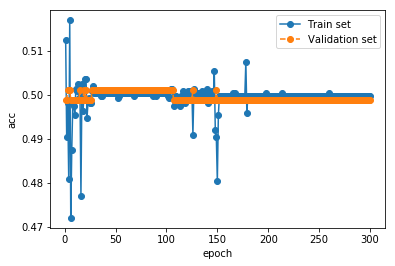

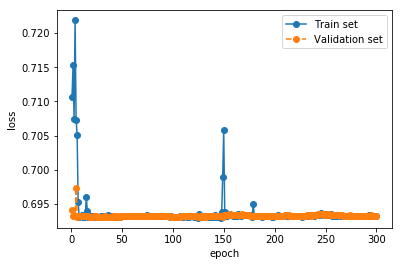

Accuracy for glove model: 51.06%


In [53]:
set_verbosity(ERROR)
epochs = 200
max_length= 50
vocab_size = 6000

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/weights_for_first.hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)


model = text_DLModel(vocab_size , max_length)
history = model.fit(x_train,y_train, validation_split=0.20, batch_size=80 ,verbose=0, epochs=epochs, callbacks=[monitor,checkpoint,time_summary,estimetor])
#model.load_weights('wieght_save/weights_for_second__first.hdf5') 

plot_training_summary(history,time_summary)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy for glove model: %.2f%%" % (scores[1]*100))

**The best accuracy: 51.06%**
>For:
epochs: 200        <br>
batch_size: 120     <br>
max_length: 50       <br>
vocab_size: 6000     <br>

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:black;text-align:center;border-radius: 25px;padding:3px">
    <h4> text_DLModel </h4>
</div>

In [42]:
def text_DLModel2(vocab_size,max_length ):
    model = Sequential()
    model.add(Embedding(vocab_size, 120, input_length=max_length))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [43]:
set_verbosity(ERROR)
epochs = 400
#max_length= 25
vocab_size = 1000

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/weights_for_first.hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)


model = text_DLModel2(vocab_size , max_length)
history = model.fit(x_train,y_train, validation_split=0.20, batch_size=80 ,verbose=0, epochs=epochs, callbacks=[monitor,checkpoint,time_summary,estimetor])
#model.load_weights('wieght_save/weights_for_second__first.hdf5') 

[400/400]

Training time: 0:13:47.721788(HH:MM:SS)
Epoch time avg: 0:00:02.069267(HH:MM:SS)


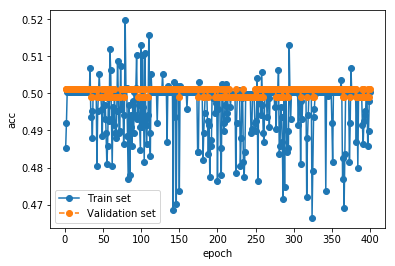

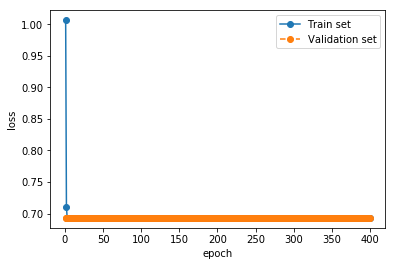

Accuracy for glove model: 48.94%


In [44]:
plot_training_summary(history,time_summary)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy for glove model: %.2f%%" % (scores[1]*100))

**The best accuracy: 48.94%**

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:black;text-align:center;border-radius: 25px;padding:3px">
    <h4> semeval2017-task4  </h4>
</div>

In [ ]:
## create model
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
model_glove.fit(data, np.array(labels), validation_split=0.4, epochs = 3)

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:black;text-align:center;border-radius: 25px;padding:3px">
    <h4> semeval2017-task4  </h4>
</div>

<div style="border: 4px solid #B3001E;background-color:#BFE6FF;color:red;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    
https://github.com/cbaziotis/datastories-semeval2017-task4
    
    
</div>

In [69]:
from keras.constraints import maxnorm
from keras.engine import Input
from keras.engine import Model
from keras.layers import Dropout, Dense, Bidirectional, \
    LSTM, Embedding, GaussianNoise, Activation, Flatten, \
    RepeatVector, MaxoutDense, GlobalMaxPooling1D, \
    Convolution1D, MaxPooling1D, concatenate, Conv1D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
#from kutilities.layers import AttentionWithContext, Attention, MeanOverTime
from sklearn import preprocessing


from abc import ABCMeta, abstractmethod

#from frozendict import frozendict


In [ ]:
class ResourceManager(metaclass=ABCMeta):
    def __init__(self):
        self.wv_filename = ""
        self.parsed_filename = ""

    @abstractmethod
    def write(self):
        """
        parse the raw file/files and write the data to disk
        :return:
        """
        pass

    @abstractmethod
    def read(self):
        """
        read the parsed file from disk
        :return:
        """
        pass

    def read_hashable(self):
        return frozendict(self.read())

In [ ]:
class WordVectorsManager(ResourceManager):
    def __init__(self, corpus=None, dim=None, omit_non_english=False):
        super().__init__()

        self.omit_non_english = omit_non_english
        self.wv_filename = "{}.{}d.txt".format(corpus, str(dim))
        self.parsed_filename = "{}.{}d.pickle".format(corpus, str(dim))

    def is_ascii(self, text):
        try:
            text.encode('ascii')
            return True
        except:
            return False

    def write(self):
        _word_vector_file = os.path.join(os.path.dirname(__file__), self.wv_filename)

        if os.path.exists(_word_vector_file):
            print('Indexing file {} ...'.format(self.wv_filename))
            embeddings_dict = {}
            f = open(_word_vector_file, "r", encoding="utf-8")
            for i, line in enumerate(f):
                values = line.split()
                word = values[0]
                coefs = numpy.asarray(values[1:], dtype='float32')
                # if not self.is_ascii(word):
                #     print(word)

                # if word.lower() in {'<unk>', "<unknown>"}:
                #     print(word)
                #     print("UNKNOWN")
                #     print()

                if self.omit_non_english and not self.is_ascii(word):
                    continue

                embeddings_dict[word] = coefs
            f.close()
            print('Found %s word vectors.' % len(embeddings_dict))

            with open(os.path.join(os.path.dirname(__file__), self.parsed_filename), 'wb') as pickle_file:
                pickle.dump(embeddings_dict, pickle_file)

        else:
            print("{} not found!".format(_word_vector_file))
            raise FileNotFoundError(
                errno.ENOENT, os.strerror(errno.ENOENT), _word_vector_file)

    def read(self):
        _parsed_file = os.path.join(os.path.dirname(__file__), self.parsed_filename)
        if os.path.exists(_parsed_file):
            with open(_parsed_file, 'rb') as f:
                return pickle.load(f)
        else:
            self.write()
            return self.read()

In [70]:
def embeddings_layer(max_length, embeddings, trainable=False, masking=False,
                     scale=False, normalize=False):
    if scale:
        print("Scaling embedding weights...")
        embeddings = preprocessing.scale(embeddings)
    if normalize:
        print("Normalizing embedding weights...")
        embeddings = preprocessing.normalize(embeddings)

    vocab_size = embeddings.shape[0]
    embedding_size = embeddings.shape[1]

    _embedding = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_size,
        input_length=max_length if max_length > 0 else None,
        trainable=trainable,
        mask_zero=masking if max_length > 0 else False,
        weights=[embeddings]
    )

    return _embedding

def get_RNN(unit=LSTM, cells=64, bi=False, return_sequences=True, dropout_U=0.,
            consume_less='cpu', l2_reg=0):
    rnn = unit(cells, return_sequences=return_sequences,
               consume_less=consume_less, dropout_U=dropout_U,
               W_regularizer=l2(l2_reg))
    if bi:
        return Bidirectional(rnn)
    else:
        return rnn
def target_RNN(wv, tweet_max_length, aspect_max_length, classes=2, **kwargs):
    ######################################################
    # HyperParameters
    ######################################################
    noise = kwargs.get("noise", 0)
    trainable = kwargs.get("trainable", False)
    rnn_size = kwargs.get("rnn_size", 75)
    rnn_type = kwargs.get("rnn_type", LSTM)
    final_size = kwargs.get("final_size", 100)
    final_type = kwargs.get("final_type", "linear")
    use_final = kwargs.get("use_final", False)
    drop_text_input = kwargs.get("drop_text_input", 0.)
    drop_text_rnn = kwargs.get("drop_text_rnn", 0.)
    drop_text_rnn_U = kwargs.get("drop_text_rnn_U", 0.)
    drop_target_rnn = kwargs.get("drop_target_rnn", 0.)
    drop_rep = kwargs.get("drop_rep", 0.)
    drop_final = kwargs.get("drop_final", 0.)
    activity_l2 = kwargs.get("activity_l2", 0.)
    clipnorm = kwargs.get("clipnorm", 5)
    bi = kwargs.get("bi", False)
    lr = kwargs.get("lr", 0.001)

    attention = kwargs.get("attention", "simple")
    #####################################################
    shared_RNN = get_RNN(rnn_type, rnn_size, bi=bi, return_sequences=True,
                         dropout_U=drop_text_rnn_U)

    input_tweet = Input(shape=[tweet_max_length], dtype='int32')
    input_aspect = Input(shape=[aspect_max_length], dtype='int32')

    # Embeddings
    tweets_emb = embeddings_layer(max_length=tweet_max_length, embeddings=wv, trainable=trainable, masking=True)(input_tweet)
    tweets_emb = GaussianNoise(noise)(tweets_emb)
    tweets_emb = Dropout(drop_text_input)(tweets_emb)

    aspects_emb = embeddings_layer(max_length=aspect_max_length, embeddings=wv,
                                   trainable=trainable, masking=True)(
        input_aspect)
    aspects_emb = GaussianNoise(noise)(aspects_emb)

    # Recurrent NN
    h_tweets = shared_RNN(tweets_emb)
    h_tweets = Dropout(drop_text_rnn)(h_tweets)

    h_aspects = shared_RNN(aspects_emb)
    h_aspects = Dropout(drop_target_rnn)(h_aspects)
    h_aspects = MeanOverTime()(h_aspects)
    h_aspects = RepeatVector(tweet_max_length)(h_aspects)

    # Merge of Aspect + Tweet
    representation = concatenate([h_tweets, h_aspects])

    # apply attention over the hidden outputs of the RNN's
    att_layer = AttentionWithContext if attention == "context" else Attention
    representation = att_layer()(representation)
    representation = Dropout(drop_rep)(representation)

    if use_final:
        if final_type == "maxout":
            representation = MaxoutDense(final_size)(representation)
        else:
            representation = Dense(final_size, activation=final_type)(
                representation)
        representation = Dropout(drop_final)(representation)

    ######################################################
    # Probabilities
    ######################################################
    probabilities = Dense(1 if classes == 2 else classes,
                          activation="sigmoid" if classes == 2 else "softmax",
                          activity_regularizer=l2(activity_l2))(representation)

    model = Model(input=[input_aspect, input_tweet], output=probabilities)

    loss = "binary_crossentropy" if classes == 2 else "categorical_crossentropy"
    model.compile(optimizer=Adam(clipnorm=clipnorm, lr=lr), loss=loss)
    return model

In [ ]:
def embeddings_layer(max_length, embeddings, trainable=False, masking=False, scale=False, normalize=False):
    if scale:
        print("Scaling embedding weights...")
        embeddings = preprocessing.scale(embeddings)
    if normalize:
        print("Normalizing embedding weights...")
        embeddings = preprocessing.normalize(embeddings)

    vocab_size = embeddings.shape[0]
    embedding_size = embeddings.shape[1]

    _embedding = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_size,
        input_length=max_length if max_length > 0 else None,
        trainable=trainable,
        mask_zero=masking if max_length > 0 else False,
        weights=[embeddings]
    )

    return _embedding


def model_sk4():
    input_tweet = Input(shape=[tweet_max_length], dtype='int32')
    # input_aspect = Input(shape=[aspect_max_length], dtype='int32')
    
    # Embeddings
    tweets_emb = embeddings_layer(max_length=tweet_max_length, embeddings=wv, trainable=trainable, masking=True)(input_tweet)
    tweets_emb = GaussianNoise(noise)(tweets_emb)
    tweets_emb = Dropout(drop_text_input)(tweets_emb)
    
    #aspects_emb = embeddings_layer(max_length=aspect_max_length, embeddings=wv,trainable=trainable, masking=True)(input_aspect)
    #aspects_emb = GaussianNoise(noise)(aspects_emb)
    
    # Merge of Aspect + Tweet
    #representation = concatenate([h_tweets, h_aspects])

In [71]:
def target_RNN(wv, tweet_max_length, aspect_max_length, classes=2, **kwargs):
    ######################################################
    # HyperParameters
    ######################################################
    noise = kwargs.get("noise", 0)
    trainable = kwargs.get("trainable", False)
    rnn_size = kwargs.get("rnn_size", 75)
    rnn_type = kwargs.get("rnn_type", LSTM)
    final_size = kwargs.get("final_size", 100)
    final_type = kwargs.get("final_type", "linear")
    use_final = kwargs.get("use_final", False)
    drop_text_input = kwargs.get("drop_text_input", 0.)
    drop_text_rnn = kwargs.get("drop_text_rnn", 0.)
    drop_text_rnn_U = kwargs.get("drop_text_rnn_U", 0.)
    drop_target_rnn = kwargs.get("drop_target_rnn", 0.)
    drop_rep = kwargs.get("drop_rep", 0.)
    drop_final = kwargs.get("drop_final", 0.)
    activity_l2 = kwargs.get("activity_l2", 0.)
    clipnorm = kwargs.get("clipnorm", 5)
    bi = kwargs.get("bi", False)
    lr = kwargs.get("lr", 0.001)

    attention = kwargs.get("attention", "simple")
    #####################################################
    shared_RNN = get_RNN(rnn_type, rnn_size, bi=bi, return_sequences=True,
                         dropout_U=drop_text_rnn_U)

    input_tweet = Input(shape=[tweet_max_length], dtype='int32')
    input_aspect = Input(shape=[aspect_max_length], dtype='int32')

    # Embeddings
    tweets_emb = embeddings_layer(max_length=tweet_max_length, embeddings=wv,
                                  trainable=trainable, masking=True)(
        input_tweet)
    tweets_emb = GaussianNoise(noise)(tweets_emb)
    tweets_emb = Dropout(drop_text_input)(tweets_emb)

    aspects_emb = embeddings_layer(max_length=aspect_max_length, embeddings=wv,
                                   trainable=trainable, masking=True)(
        input_aspect)
    aspects_emb = GaussianNoise(noise)(aspects_emb)

    # Recurrent NN
    h_tweets = shared_RNN(tweets_emb)
    h_tweets = Dropout(drop_text_rnn)(h_tweets)

    h_aspects = shared_RNN(aspects_emb)
    h_aspects = Dropout(drop_target_rnn)(h_aspects)
    h_aspects = MeanOverTime()(h_aspects)
    h_aspects = RepeatVector(tweet_max_length)(h_aspects)

    # Merge of Aspect + Tweet
    representation = concatenate([h_tweets, h_aspects])

    # apply attention over the hidden outputs of the RNN's
    att_layer = AttentionWithContext if attention == "context" else Attention
    representation = att_layer()(representation)
    representation = Dropout(drop_rep)(representation)

    if use_final:
        if final_type == "maxout":
            representation = MaxoutDense(final_size)(representation)
        else:
            representation = Dense(final_size, activation=final_type)(
                representation)
        representation = Dropout(drop_final)(representation)

    ######################################################
    # Probabilities
    ######################################################
    probabilities = Dense(1 if classes == 2 else classes,
                          activation="sigmoid" if classes == 2 else "softmax",
                          activity_regularizer=l2(activity_l2))(representation)

    model = Model(input=[input_aspect, input_tweet], output=probabilities)

    loss = "binary_crossentropy" if classes == 2 else "categorical_crossentropy"
    model.compile(optimizer=Adam(clipnorm=clipnorm, lr=lr), loss=loss)
    return model

In [74]:
target_RNN(x_train, max_length, max_length, classes=2, **kwargs)

NameError: name 'kwargs' is not defined

<div style="width:100%;height:40px;border: 4px solid black;background-color:#B3001E;color:black;text-align:center;border-radius: 25px;padding:3px">
    <h4>  </h4>
</div>

In [26]:
def model_Tweets50(input_dim, output_dim=64):
    """
    input_dim : Size of the vocabulary
    output_dim: Dimension of the dense embedding.
    input_length: Length of input sequences
    
    """
    model = Sequential()
    model.add(Embedding(input_dim, output_dim))
    model.add(GlobalAveragePooling1D())
    
    #model.add(LSTM(32))
    model.add(Dense(output_dim, activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [30]:
set_verbosity(ERROR)
epochs = 3

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/weights_for_first.hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)

# embedding_matrix
model = model_Tweets50(input_dim = 2252 )
history = model.fit(x_train,y_train, validation_split=0.20, batch_size=32 ,verbose=1, epochs=epochs, callbacks=[monitor,checkpoint,time_summary,estimetor])
model.load_weights('wieght_save/weights_for_second__first.hdf5') 

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2252 arrays: [array([[-0.04597766],
       [ 0.07539941],
       [-0.11853474],
       [ 0.06086664],
       [ 0.00437364],
       [-0.15323256],
       [-0.07096647],
       [ 0.019163  ],
       [-0.00217626],
 ...

In [ ]:
model.add(Conv1D(, activation='relu'))
    model.add(MaxPool1D(pool_size=2))#MaxPooling1D(pool_size=2)
    
    model.add(LSTM(32))
    model.add(Dense(vocabulary_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))